In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, RobustScaler, QuantileTransformer, StandardScaler

plot_dir = 'plots/'

In [16]:
rm_features = [
    'IOP', 'MAP', 'SBP', 'DBP', 'HR', 'Q', 'P1', 'P2', 'P4', 'P5', 'R4', 'R5'
]   # these are the relevant features for our unsupervised clustering model

sim_feats = rm_features[5:]     # these are the simulation features

data = pd.read_csv('year0_0.csv')   # IGPS first visit dataset

train_X = data[rm_features] # "training" data
train_X

,IOP,MAP,SBP,DBP,HR,Q,P1,P2,P4,P5,R4,R5
0,20,101.00,131,86,72,0.000750,47.489958,38.966151,23.876601,19.316451,5689.151779,3574.570050
1,18,88.33,115,75,92,0.000645,41.983253,34.646439,21.624254,18.571021,5763.809313,2381.464587
2,12,92.67,122,78,56,0.000712,43.567630,35.482031,21.690086,19.048322,4121.464165,2229.961801
3,13,105.67,147,85,79,0.000884,50.544870,40.528365,23.477117,20.265926,3952.890450,2229.632001
4,20,104.00,160,76,79,0.000919,53.856323,43.438957,25.149519,20.514162,5312.670339,2982.668292
...,...,...,...,...,...,...,...,...,...,...,...,...
109,16,100.00,126,87,93,0.000746,45.616870,37.141412,22.378553,19.288318,4926.095239,2235.769782
110,12,101.00,127,88,70,0.000765,45.679086,37.000383,22.223686,19.421112,3999.419779,2229.393321
111,11,104.33,145,84,75,0.000874,49.825836,39.926434,23.217100,20.194663,3608.936539,2226.733774
112,12,96.33,119,85,74,0.000707,43.402523,35.368506,21.653685,19.014882,4119.259887,2230.007746


In [17]:
# Normalization #1
train_X = train_X.to_numpy()
X, y = train_X[:, 0], train_X[:, 1]     # save IOP and MAP data for visualization further

s = MinMaxScaler()
train_X = s.fit_transform(train_X)

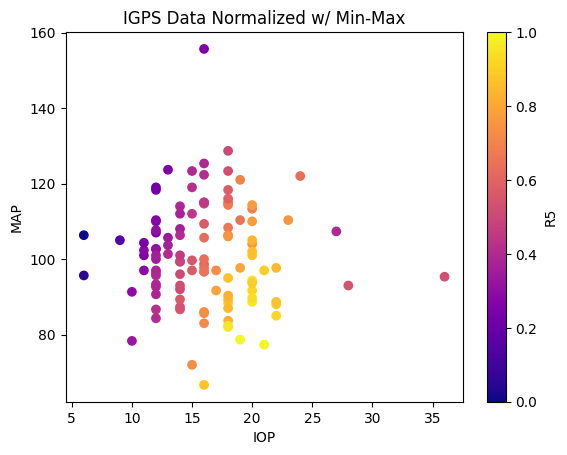

In [18]:
# I provided this visualization right here to ensure that my visualization is doing what I expect from it.
feature = train_X[:, 10]

plt.scatter(X, y, c=feature, cmap='plasma')
plt.xlabel("IOP")
plt.ylabel("MAP")
plt.title("IGPS Data Normalized w/ Min-Max")
# plt.legend()
plt.colorbar(label='R5')
plt.show()

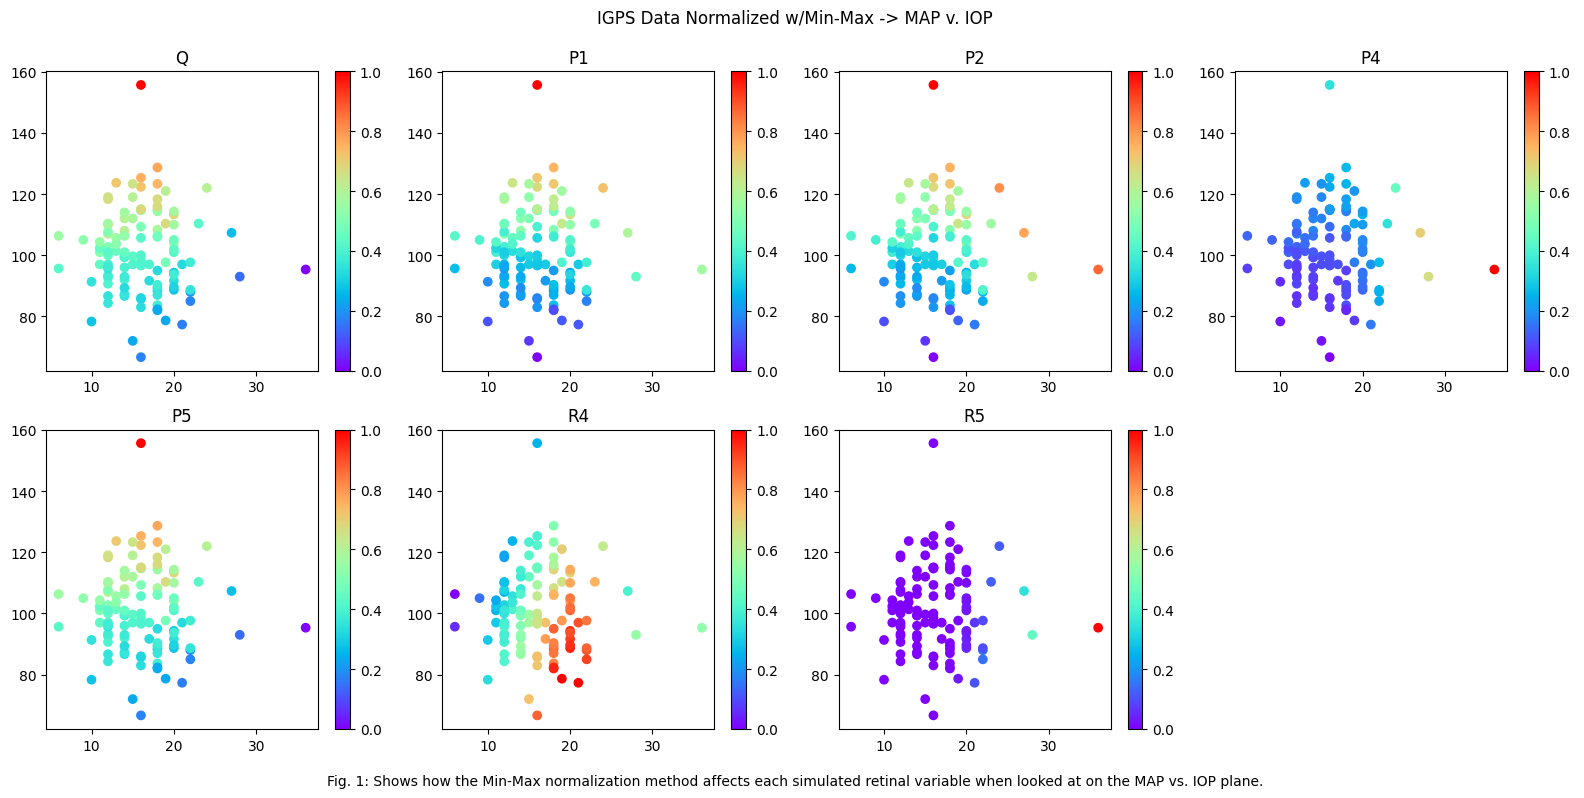

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i in range(len(sim_feats)):
    feature = train_X[:, i+5]

    row = i // 4
    col = i % 4
    sc = axes[row, col].scatter(X, y, c=feature, cmap='rainbow')
    axes[row, col].set_title(sim_feats[i])
    plt.colorbar(sc, ax=axes[row, col])

axes[1, 3].axis('off')
fig.suptitle("IGPS Data Normalized w/Min-Max -> MAP v. IOP")
plt.tight_layout(rect=[0, 0, 1, 0.99])

plt.subplots_adjust(bottom=0.08)
txt = 'Fig. 1: Shows how the Min-Max normalization method affects each simulated retinal variable when looked at on the MAP vs. IOP plane.'
fig.text(0.5, 0.01, txt, ha='center', fontsize=10)

plt.savefig(plot_dir + "min_max.png", bbox_inches='tight',pad_inches=0.1, dpi=900)
plt.show()

In [20]:
# Normalization #2
train_X = data[rm_features]

s = RobustScaler()
train_X = s.fit_transform(train_X)

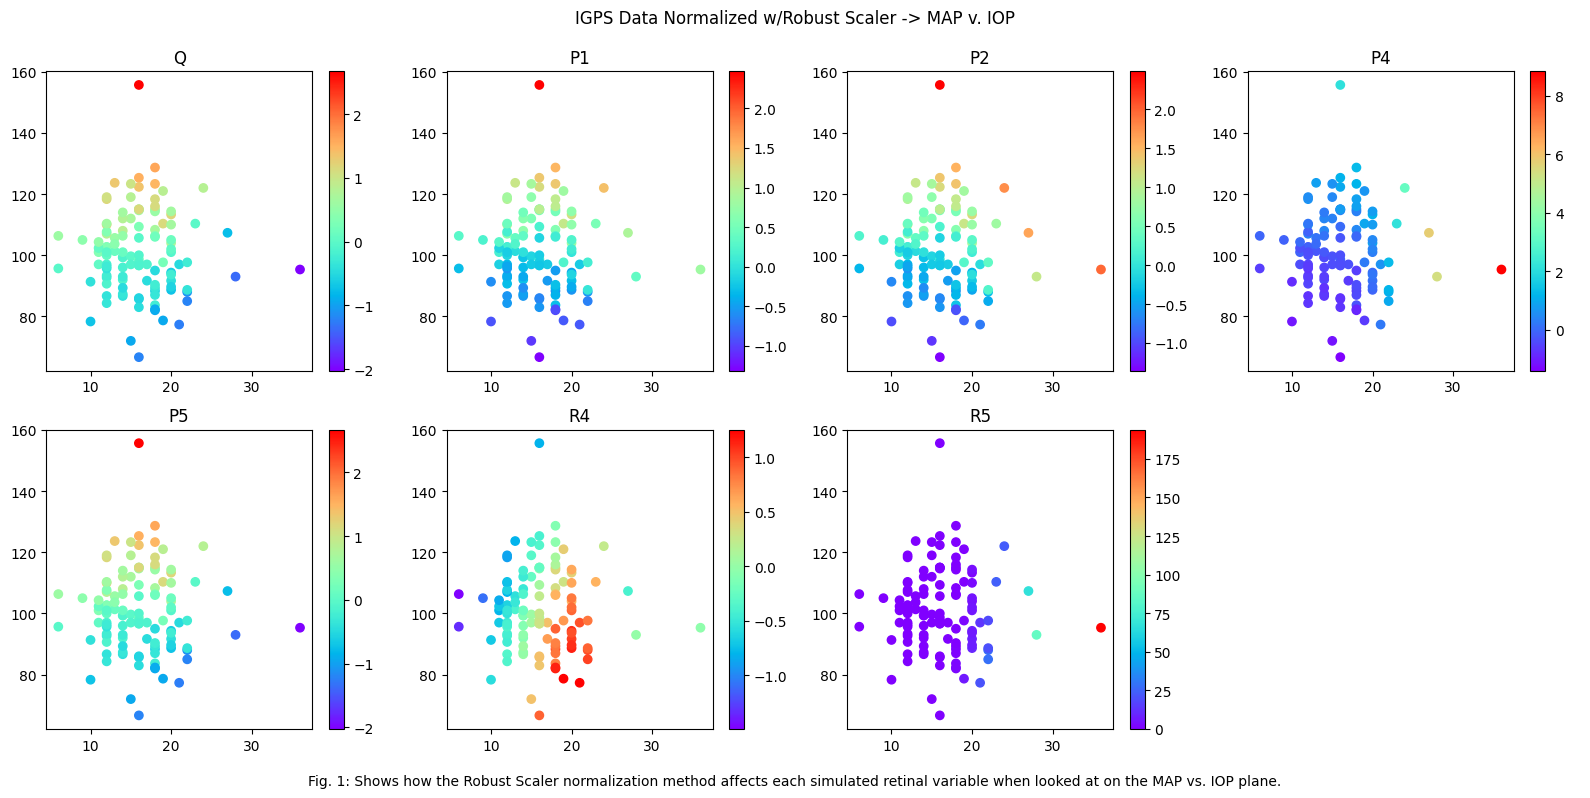

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i in range(len(sim_feats)):
    feature = train_X[:, i+5]

    row = i // 4
    col = i % 4
    sc = axes[row, col].scatter(X, y, c=feature, cmap='rainbow')
    axes[row, col].set_title(sim_feats[i])
    plt.colorbar(sc, ax=axes[row, col])

axes[1, 3].axis('off')
fig.suptitle("IGPS Data Normalized w/Robust Scaler -> MAP v. IOP")
plt.tight_layout(rect=[0, 0, 1, 0.99])

plt.subplots_adjust(bottom=0.08)
txt = 'Fig. 1: Shows how the Robust Scaler normalization method affects each simulated retinal variable when looked at on the MAP vs. IOP plane.'
fig.text(0.5, 0.01, txt, ha='center', fontsize=10)

plt.savefig( plot_dir + "robust.png", bbox_inches='tight',pad_inches=0.1, dpi=900)
plt.show()

In [22]:
# Normalization #3
train_X = data[rm_features]

s = QuantileTransformer(output_distribution='normal')
train_X = s.fit_transform(train_X)

/home/mikey-joyce/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (114). n_quantiles is set to n_samples.
  warnings.warn(


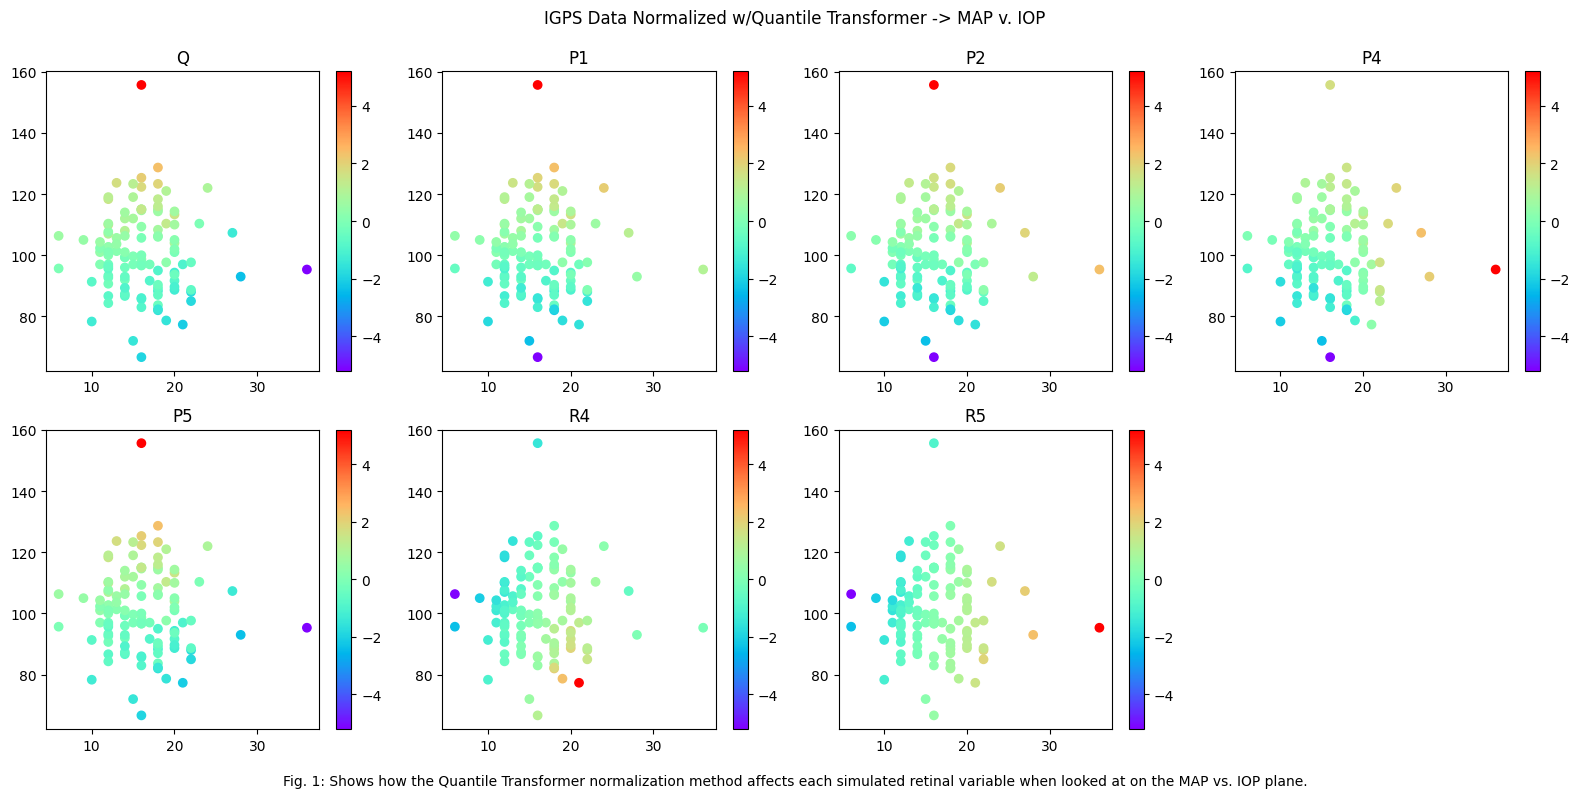

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i in range(len(sim_feats)):
    feature = train_X[:, i+5]

    row = i // 4
    col = i % 4
    sc = axes[row, col].scatter(X, y, c=feature, cmap='rainbow')
    axes[row, col].set_title(sim_feats[i])
    plt.colorbar(sc, ax=axes[row, col])

axes[1, 3].axis('off')
fig.suptitle("IGPS Data Normalized w/Quantile Transformer -> MAP v. IOP")
plt.tight_layout(rect=[0, 0, 1, 0.99])

plt.subplots_adjust(bottom=0.08)
txt = 'Fig. 1: Shows how the Quantile Transformer normalization method affects each simulated retinal variable when looked at on the MAP vs. IOP plane.'
fig.text(0.5, 0.01, txt, ha='center', fontsize=10)

plt.savefig( plot_dir + "quantile.png", bbox_inches='tight',pad_inches=0.1, dpi=900)
plt.show()

In [24]:
# Normalization #4
train_X = data[rm_features]

s = StandardScaler()
train_X = s.fit_transform(train_X)
train_X = np.tanh(train_X)

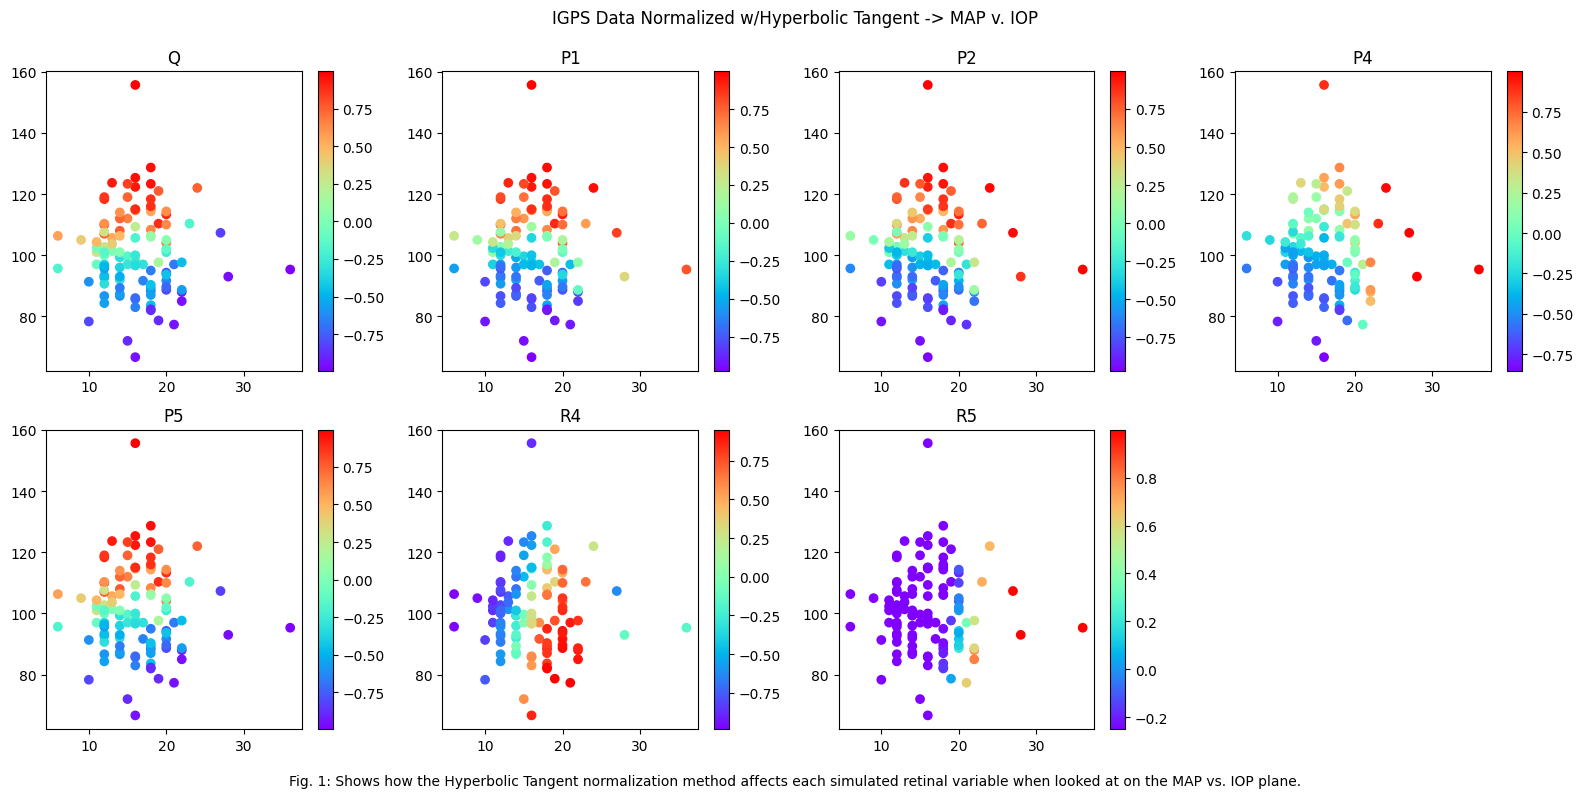

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i in range(len(sim_feats)):
    feature = train_X[:, i+5]

    row = i // 4
    col = i % 4
    sc = axes[row, col].scatter(X, y, c=feature, cmap='rainbow')
    axes[row, col].set_title(sim_feats[i])
    plt.colorbar(sc, ax=axes[row, col])

axes[1, 3].axis('off')
fig.suptitle("IGPS Data Normalized w/Hyperbolic Tangent -> MAP v. IOP")
plt.tight_layout(rect=[0, 0, 1, 0.99])

plt.subplots_adjust(bottom=0.08)
txt = 'Fig. 1: Shows how the Hyperbolic Tangent normalization method affects each simulated retinal variable when looked at on the MAP vs. IOP plane.'
fig.text(0.5, 0.01, txt, ha='center', fontsize=10)

plt.savefig( plot_dir + "tanh.png", bbox_inches='tight',pad_inches=0.1, dpi=900)
plt.show()

In [26]:
# Normalization #5
df_copy = data.copy()
df_copy['R5'] = np.log(df_copy['R5'])

train_X = df_copy[rm_features]
train_X = train_X.to_numpy()

s = StandardScaler()
train_X = s.fit_transform(train_X)
train_X = np.tanh(train_X)

s = MinMaxScaler()
train_X = s.fit_transform(train_X)

# train_X[:, -1] = np.log1p(train_X[:, -1])

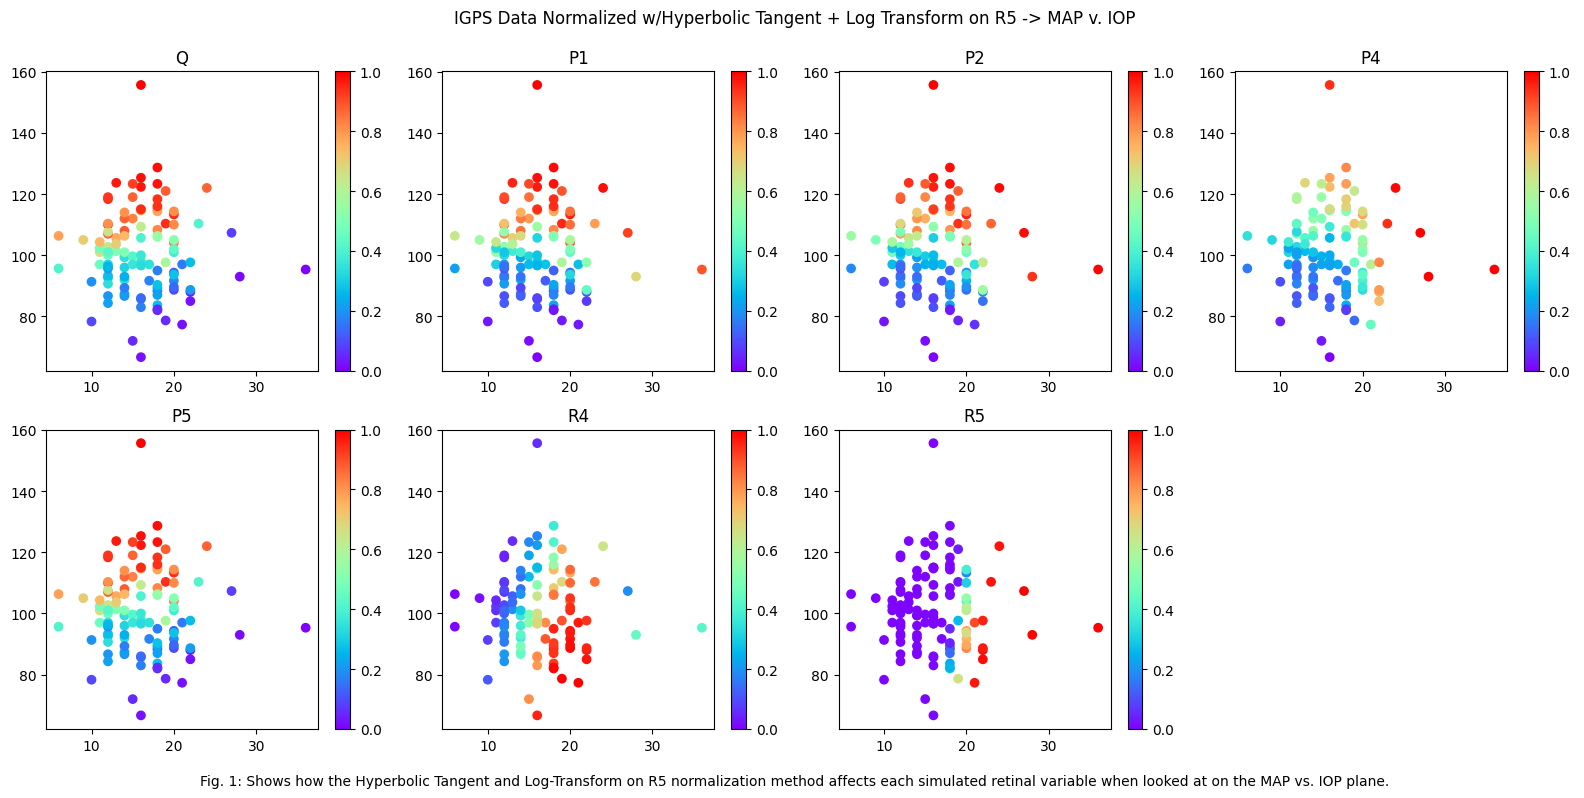

In [27]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i in range(len(sim_feats)):
    feature = train_X[:, i+5]

    row = i // 4
    col = i % 4
    sc = axes[row, col].scatter(X, y, c=feature, cmap='rainbow')
    axes[row, col].set_title(sim_feats[i])
    plt.colorbar(sc, ax=axes[row, col])

axes[1, 3].axis('off')
fig.suptitle("IGPS Data Normalized w/Hyperbolic Tangent + Log Transform on R5 -> MAP v. IOP")
plt.tight_layout(rect=[0, 0, 1, 0.99])

plt.subplots_adjust(bottom=0.08)
txt = 'Fig. 1: Shows how the Hyperbolic Tangent and Log-Transform on R5 normalization method affects each simulated retinal variable when looked at on the MAP vs. IOP plane.'
fig.text(0.5, 0.01, txt, ha='center', fontsize=10)

plt.savefig( plot_dir + "tanh_R5.png", bbox_inches='tight',pad_inches=0.1, dpi=900)
plt.show()